# Case Study: Credit Card Fraud Detection

<img src="https://raw.githubusercontent.com/ijoseff/ijoseff.github.io/master/assets/img/portfolio/credit.png" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Credit-Card-Fraud-Detection" data-toc-modified-id="Case-Study:-Credit-Card-Fraud-Detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Credit Card Fraud Detection</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-and-Data-Importation" data-toc-modified-id="Libraries-and-Data-Importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries and Data Importation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Deep-Neural-Network-Model" data-toc-modified-id="Deep-Neural-Network-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Deep Neural Network Model</a></span><ul class="toc-item"><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></li><li><span><a href="#Random-Forest-Model" data-toc-modified-id="Random-Forest-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Random Forest Model</a></span></li><li><span><a href="#Decision-Tree-Model" data-toc-modified-id="Decision-Tree-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Decision Tree Model</a></span></li><li><span><a href="#Undersampling-Application" data-toc-modified-id="Undersampling-Application-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Undersampling Application</a></span></li><li><span><a href="#SMOTE-Application" data-toc-modified-id="SMOTE-Application-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>SMOTE Application</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Fraud detection, one of the many cases of anomaly detection is an important aspect of financial markets. Is there any way to predict whether a transaction is fraudulent or not based on the history of transactions? In this project, neural network architecture will be implemented as it attempts to predict the cases as frauds or not. 

**Problem:**
 - Create a model that detects fraudulent case

**Dataset:**
 - The dataset contains 28 anonymized variables, 1 “amount” variable, 1 “time” variable, and 1 target variable — Class. The variables are anonymized to protect the privacy of the customers as the dataset is in the public domain. The dataset can be found here. ‘0’ as target variable corresponds to the non-fraudulent cases whereas ‘1’ in target variable corresponds to fraudulent cases.

**Source:** ULB-ML Group

# Libraries and Data Importation

In [22]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

np.random.seed(0)

In [2]:
# Import data
data = pd.read_csv('project_data/creditcard.csv')

# Data Exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check data dimension
data.shape

(284807, 31)

In [5]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check for missing values
data.isnull().mean()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

# Data Pre-processing

In [7]:
# Implement feature scaling
from sklearn.preprocessing import StandardScaler
data['NomarlizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# Drop the original data value
data = data.drop(['Amount'], axis = 1)

# drop the Time column
data = data.drop(['Time'], axis = 1)

In [8]:
# Check data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NomarlizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
# Create label for dependent and independent variable
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [10]:
# Check independent variables
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NomarlizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
# Check dependent variable
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [12]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
# Check train dataset dimensions
X_train.shape, y_train.shape

((199364, 29), (199364, 1))

In [14]:
# Check test dataset dimensions
X_test.shape, y_test.shape

((85443, 29), (85443, 1))

In [15]:
# Transform train dataset into array
X_train = np.array(X_train)
y_train = np.array(y_train)

# Transform test dataset into array
X_test = np.array(X_test)
y_test = np.array(y_test)

# Deep Neural Network Model

In [16]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Build model
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dropout(0.5),
    Dense(units = 24, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [17]:
# Check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
______________________________________________________

## Model Training

In [18]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the model and initiate training
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 [==============================] - 26s 2ms/step - loss: 0.0086 - accuracy: 0.9990
Epoch 2/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 40s 3ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 37s 3ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 39s 3ms/step - loss: 0.0034 - accuracy: 0.9993


## Model Evaluation

In [19]:
# Check model score in test dataset
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0037 - accuracy: 0.9993
[0.003683381946757436, 0.9993445873260498]


In [21]:
# Import libraries
import itertools
from sklearn.metrics import confusion_matrix

# Create a plot function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [24]:
# Get the predictions
y_pred = model.predict(X_test)

# Transform into dataframe
y_test = pd.DataFrame(y_test)

In [25]:
# Check confusion matrix for test dataset
cm =  confusion_matrix(y_test, y_pred.round())
print(cm)

[[85286    10]
 [   46   101]]


Confusion matrix, without normalization
[[85286    10]
 [   46   101]]


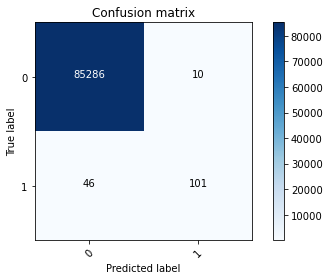

In [26]:
# Visualize confusion matrix for test dataset
plot_confusion_matrix(cm, classes = [0, 1])
plt.show()

Confusion matrix, without normalization
[[284286     29]
 [   169    323]]


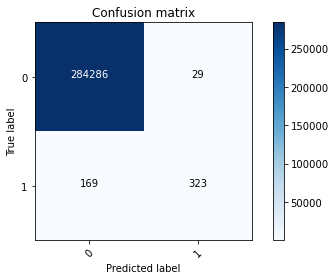

In [28]:
# Apply sampling confusion matrix # Applying the whole parameter # Entire dateset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

# Create confusion matrix for entire dataset
cm = confusion_matrix(y_expected, y_pred.round())

# Visualize confusion matrix for entire dataset
plot_confusion_matrix(cm, classes = [0, 1])
plt.show()

---

# Random Forest Model

In [37]:
# Apply random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, y_train.values.ravel())

# Get predictions
y_pred = random_forest.predict(X_test)

In [38]:
# Check test score
random_forest.score(X_test, y_test)

0.9994967405170698

Confusion matrix, without normalization
[[85290     6]
 [   37   110]]


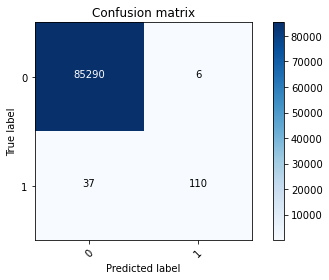

In [43]:
# Check confusion matrix for test dataset
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
plot_confusion_matrix(cm, classes = [0, 1])
plt.show()

Confusion matrix, without normalization
[[284308      7]
 [    55    437]]


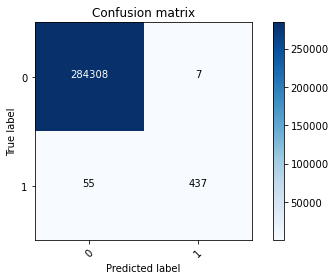

In [46]:
# Apply sampling confusion matrix # Applying the whole parameter # Entire dateset
y_pred = random_forest.predict(X)

# Confusion matrix for entire dataset
cm = confusion_matrix(y, y_pred.round())

# Print confusion matrix
plot_confusion_matrix(cm, classes = [0, 1])
plt.show()

# Decision Tree Model

In [48]:
# Import library
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Fit the model
decision_tree.fit(X_train, y_train.values.ravel())

# Get predictions
y_pred = decision_tree.predict(X_test)

In [49]:
# Check test score
decision_tree.score(X_test, y_test)

0.9991807403766253

Confusion matrix, without normalization
[[284279     36]
 [    34    458]]


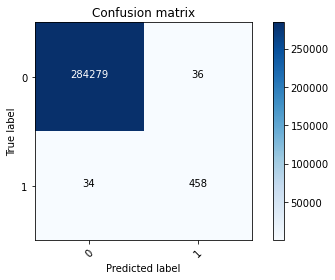

In [50]:
# Apply sampling confusion matrix # Applying the whole parameter # Entire dateset
y_pred = decision_tree.predict(X)

# Confusion matrix for entire dataset
cm = confusion_matrix(y, y_pred.round())

# Print confusion matrix
plot_confusion_matrix(cm, classes = [0, 1])
plt.show()

# Undersampling Application

In [69]:
# Undersampling techinique
# Normal indices
normal_indices = data[data['Class'] == 0].index

# Fraud Indices
fraud_indices = np.array(data[data['Class'] == 1].index)

# Get the number of fraud data
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [70]:
# Generates a random sample from a given 1-D array
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)

# Create an array
random_normal_indices = np.array(random_normal_indices)

# Check the size
print(len(random_normal_indices))

492


In [71]:
# concatenate dataframe
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [74]:
# label under sample data
under_sample_data = data.iloc[under_sample_indices, :]
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [75]:
# Features
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']

# Label
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [77]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [78]:
# Transform into array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Transform into array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [80]:
# Check the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
______________________________________________________

In [81]:
# Fit the model and initiate training
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
46/46 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.9317
Epoch 2/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9462
Epoch 3/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9608
Epoch 4/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9608
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9637


Confusion matrix, without normalization
[[150   1]
 [ 19 126]]


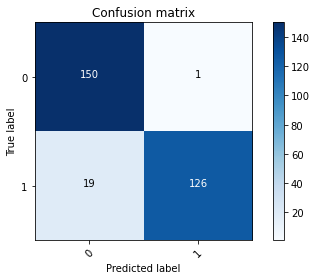

In [82]:
# Predict using the undersample dataset
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)

# Visualize confusion matrix
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes = [0,1])
plt.show()

Confusion matrix, without normalization
[[281537   2778]
 [    41    451]]


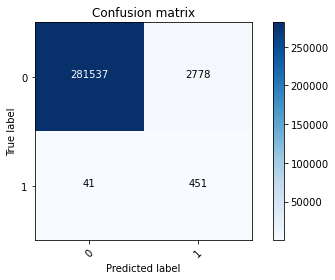

In [83]:
# Predict using the entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

# Visualize confusion matrix
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes = [0,1])
plt.show()

# SMOTE Application

In [86]:
# Install library
!pip install -U imbalanced-learn

In [92]:
# Import libary
from imblearn.over_sampling import SMOTE

In [93]:
# Fit SMOTE
X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

In [94]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [95]:
# Transform into array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Transform into array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [96]:
# Fit the model and initiate training
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
26537/26537 [==============================] - 110s 4ms/step - loss: 0.0282 - accuracy: 0.9904
Epoch 2/5
26537/26537 [==============================] - 119s 4ms/step - loss: 0.0144 - accuracy: 0.9961
Epoch 3/5
26537/26537 [==============================] - 89s 3ms/step - loss: 0.0117 - accuracy: 0.9968
Epoch 4/5
26537/26537 [==============================] - 116s 4ms/step - loss: 0.0111 - accuracy: 0.9973
Epoch 5/5
26537/26537 [==============================] - 103s 4ms/step - loss: 0.0096 - accuracy: 0.9975


Confusion matrix, without normalization
[[85014   336]
 [   54 85185]]


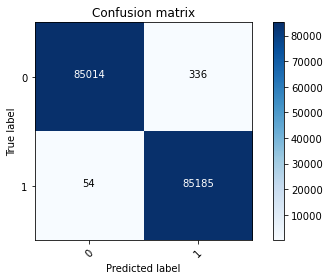

In [97]:
# Predict using the undersample dataset
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)

# Visualize confusion matrix
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes = [0,1])
plt.show()

Confusion matrix, without normalization
[[283268   1047]
 [     5    487]]


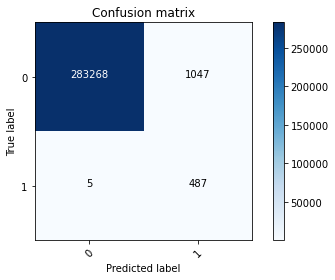

In [98]:
# Predict using the entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

# Visualize confusion matrix
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes = [0,1])
plt.show()

# Conclusion

Several models were tested such as Deep Neural Network, Random Forest and Decision Tree. Under sampling was implemented in this classification problem due to imbalance of dataset and then the
most common technique known as SMOTE: Synthetic Minority Over-sampling Technique.

The final model used was Deep Neural Network and it obtained less error in prediction